In [ ]:
'''Question 1: What is Simple Linear Regression?

ans: Simple Linear Regression is a basic statistical method used to model the relationship between two variables:

Independent variable (X) → the predictor/input

Dependent variable (Y) → the response/output

It assumes that the relationship between X and Y can be represented with a straight line.

Question 2: What are the key assumptions of Simple Linear Regression?

ans:1. Linearity

The relationship between the independent variable (X) and dependent variable (Y) is linear.
Meaning: changes in X lead to proportional changes in Y.

2. Independence of Errors

Residuals (errors) should be independent of each other.
No pattern or correlation should exist among them.

3. Homoscedasticity

The variance of residuals should be constant across all values of X.
If errors increase or decrease with X → heteroscedasticity, which violates this assumption.

 4. Normality of Errors

Residuals should be approximately normally distributed.
Useful for reliable hypothesis testing and confidence intervals.

Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

ans: Heteroscedasticity refers to a condition in regression analysis where the variance of residuals
(errors) is not constant across all levels of the independent variable(s).

The spread of errors changes as X changes.
The pattern of residuals looks like a cone, funnel, or wave instead of being evenly spread.

1. It makes coefficient estimates less efficient

The regression still gives unbiased coefficients, but they become less precise.

2. It invalidates statistical tests

Standard errors become wrong

t-tests and F-tests become unreliable

p-values may no longer be trustworthy

This means your model may look statistically significant even when it’s not.

3. It reduces prediction accuracy

If variance changes with X, predictions become less stable at certain ranges.

4. It signals model misspecification

Heteroscedasticity may indicate:

Missing important variables

Wrong functional form

Outliers or skewed data

Question 4: What is Multiple Linear Regression?

ans:Multiple Linear Regression (MLR) is an extension of Simple Linear Regression
that models the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, ...).

Question 5: What is polynomial regression, and how does it differ from linear
regression?

ans: Polynomial Regression is a type of regression analysis where the relationship between the independent variable (X)
    and dependent variable (Y) is modeled as an nth-degree polynomial, rather than a straight line.

It is still a linear model in terms of coefficients, but nonlinear in terms of X.'''



Slope (beta1): 1.98
Intercept (beta0): 0.18


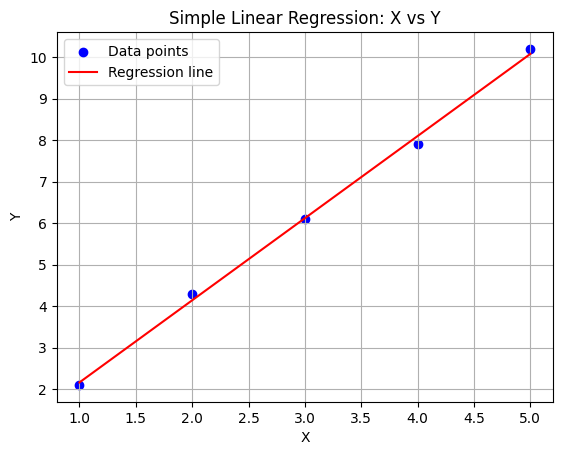

In [1]:
'''Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.'''
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5], dtype=float)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2], dtype=float)

# Fit simple linear regression using numpy.polyfit (degree 1 = straight line)
slope, intercept = np.polyfit(X, Y, 1)

print("Slope (beta1):", slope)
print("Intercept (beta0):", intercept)

# Predicted values for plotting the regression line
Y_pred = intercept + slope * X

# Plot data points
plt.scatter(X, Y, color="blue", label="Data points")

# Plot regression line
plt.plot(X, Y_pred, color="red", label="Regression line")

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression: X vs Y")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
'''Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.'''
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
area = [1200, 1500, 1800, 2000]
rooms = [2, 3, 3, 4]
price = [250000, 300000, 320000, 370000]

df = pd.DataFrame({
    "Area": area,
    "Rooms": rooms,
    "Price": price
})

# Define predictors and add intercept
X = df[["Area", "Rooms"]]
X = sm.add_constant(X)  # adds column 'const' for intercept
y = df["Price"]

# Fit multiple linear regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Calculate VIF for each predictor (including intercept, which you can ignore in interpretation)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sat, 06 Dec 2025   Prob (F-statistic):             0.0377
Time:                        16:44:15   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Quadratic coefficients (a, b, c): [0.2  1.94 0.06]


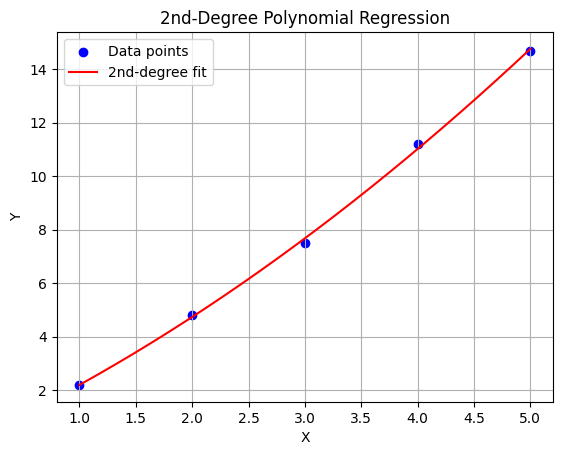

In [3]:
'''Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.'''
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5], dtype=float)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7], dtype=float)

# Fit a 2nd-degree polynomial
coeffs = np.polyfit(X, Y, deg=2)   # [a, b, c]
poly = np.poly1d(coeffs)

print("Quadratic coefficients (a, b, c):", coeffs)

# Create a smooth range of X values for plotting the curve
X_smooth = np.linspace(X.min(), X.max(), 200)
Y_smooth = poly(X_smooth)

# Plot original data points
plt.scatter(X, Y, color="blue", label="Data points")

# Plot polynomial regression curve
plt.plot(X_smooth, Y_smooth, color="red", label="2nd-degree fit")

# Labels, title, legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd-Degree Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()


Slope: 1.15
Intercept: 6.499999999999997
Residuals: [-3.   5.5 -1.  -2.5  1. ]


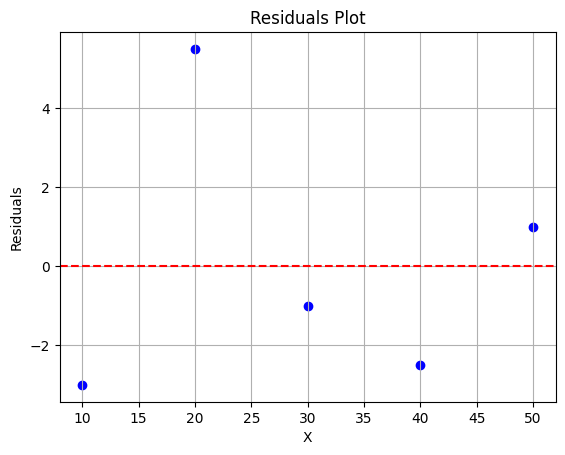

In [4]:
'''Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
'''
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([10, 20, 30, 40, 50], dtype=float)
Y = np.array([15, 35, 40, 50, 65], dtype=float)

# Fit simple linear regression using polyfit
slope, intercept = np.polyfit(X, Y, 1)
Y_pred = intercept + slope * X

# Residuals
residuals = Y - Y_pred

print("Slope:", slope)
print("Intercept:", intercept)
print("Residuals:", residuals)

# Residuals vs X plot
plt.scatter(X, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()


In [ ]:
'''Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

ans: Step 1: Re‑check data and diagnostics
Start with clear diagnostics: residual plots vs fitted values and predictors for heteroscedasticity, and VIF/correlation matrix for multicollinearity.​

Confirm that the issues are not due to data errors or extreme outliers (e.g., one huge luxury property) and decide whether any clearly erroneous observations should be removed or capped.​

Step 2: Address heteroscedasticity
Try transformations of the target (e.g., log(Price), square root) or relevant predictors (e.g., log(Area)), which often stabilizes variance when variability increases with house size or price level.​

If transformation is insufficient, consider Weighted Least Squares (WLS) or generalized least squares, giving lower weight to observations with higher error variance to meet model assumptions more closely.​

Step 3: Address multicollinearity
Use the correlation matrix and VIF to identify highly correlated predictors, such as Area and Rooms or multiple location encodings that carry similar information.​

Reduce redundancy by:

Dropping one of a pair of highly correlated variables

Combining related variables into a composite feature (e.g., Area per room, or an overall “size index”)

Or switching to regularized models like ridge or lasso regression to shrink unstable coefficients while retaining predictive power.​

Step 4: Refine feature engineering for real estate
For location, prefer a well-structured representation (e.g., neighborhood dummies or an encoded “location score”) instead of many overlapping location variables that inflate multicollinearity.​

Standardize continuous predictors and ensure the final set is interpretable, avoiding nearly duplicate variables while preserving the main economic drivers of house prices.​

Step 5: Refit, validate, and compare models
Refit the adjusted model (with transformed variables and reduced/regularized predictors), then re‑check residual plots and VIF to confirm that heteroscedasticity and multicollinearity have improved.​

Use cross‑validation and out‑of‑sample performance (e.g., RMSE or MAE on a validation set) to ensure that the changes increase both statistical reliability and predictive accuracy for pricing new houses.​
'''